In [12]:
# Parsing the provided data and calculating statistics
import pandas as pd

# Data as provided
data = {
    "Date": [
        "2023-10-31", "2023-09-30", "2023-08-31", "2023-07-31", "2023-06-30",
        "2023-04-30", "2023-03-31", "2023-02-28", "2023-01-31", "2022-12-31",
        "2022-11-30"
    ],
    "Final Portfolio Value": [
        1005.82, 999.7, 989.63, 1009.93, 995.56,
        1001.95, 995.93, 992.14, 1024.76, 969.35,
        970.77
    ],
    "Total PnL": [
        0.44, 1.52, 0.77, -2.29, 0.78,
        6.32, -7.11, 3.74, 0.51, -0.56,
        -5.03
    ],
    "Annualized Volatility": [
        0.55, 0.40, 0.61, 0.78, 0.71,
        1.02, 0.80, 0.71, 0.86, 0.77,
        1.75
    ],
    "Sharpe Ratio": [
        0.80, 3.83, 1.25, -2.94, 1.09,
        6.21, -8.91, 5.26, 0.59, -0.72,
        -2.87
    ],
    "Total Trades": [
        32, 14, 21, 28, 30,
        19, 14, 14, 15, 17,
        36
    ],
    "Total Turnover": [
        20585750037.0, 12126296287.0, 21519550483.0, 36459926160.0, 20412788930.0,
        62701979620.0, 31390076138.0, 32150070041.0, 40965904947.0, 36816850421.0,
        89412897896.0
    ]
}



# Converting to DataFrame
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])

# Calculating summary statistics
summary_stats = {
    "Average Final Portfolio Value": df["Final Portfolio Value"].mean(),
    "Total PnL": df["Total PnL"].sum(),
    "Average Annualized Volatility": df["Annualized Volatility"].mean(),
    "Average Sharpe Ratio": df["Sharpe Ratio"].mean(),
    "Total Trades": df["Total Trades"].sum(),
    "Total Turnover": df["Total Turnover"].sum(),
    "Highest Sharpe Ratio Date": df.loc[df["Sharpe Ratio"].idxmax()]["Date"],
    "Lowest Sharpe Ratio Date": df.loc[df["Sharpe Ratio"].idxmin()]["Date"]
}

summary_stats


{'Average Final Portfolio Value': 995.9581818181819,
 'Total PnL': -0.910000000000001,
 'Average Annualized Volatility': 0.8145454545454546,
 'Average Sharpe Ratio': 0.32636363636363636,
 'Total Trades': 240,
 'Total Turnover': 404542090960.0,
 'Highest Sharpe Ratio Date': Timestamp('2023-04-30 00:00:00'),
 'Lowest Sharpe Ratio Date': Timestamp('2023-03-31 00:00:00')}

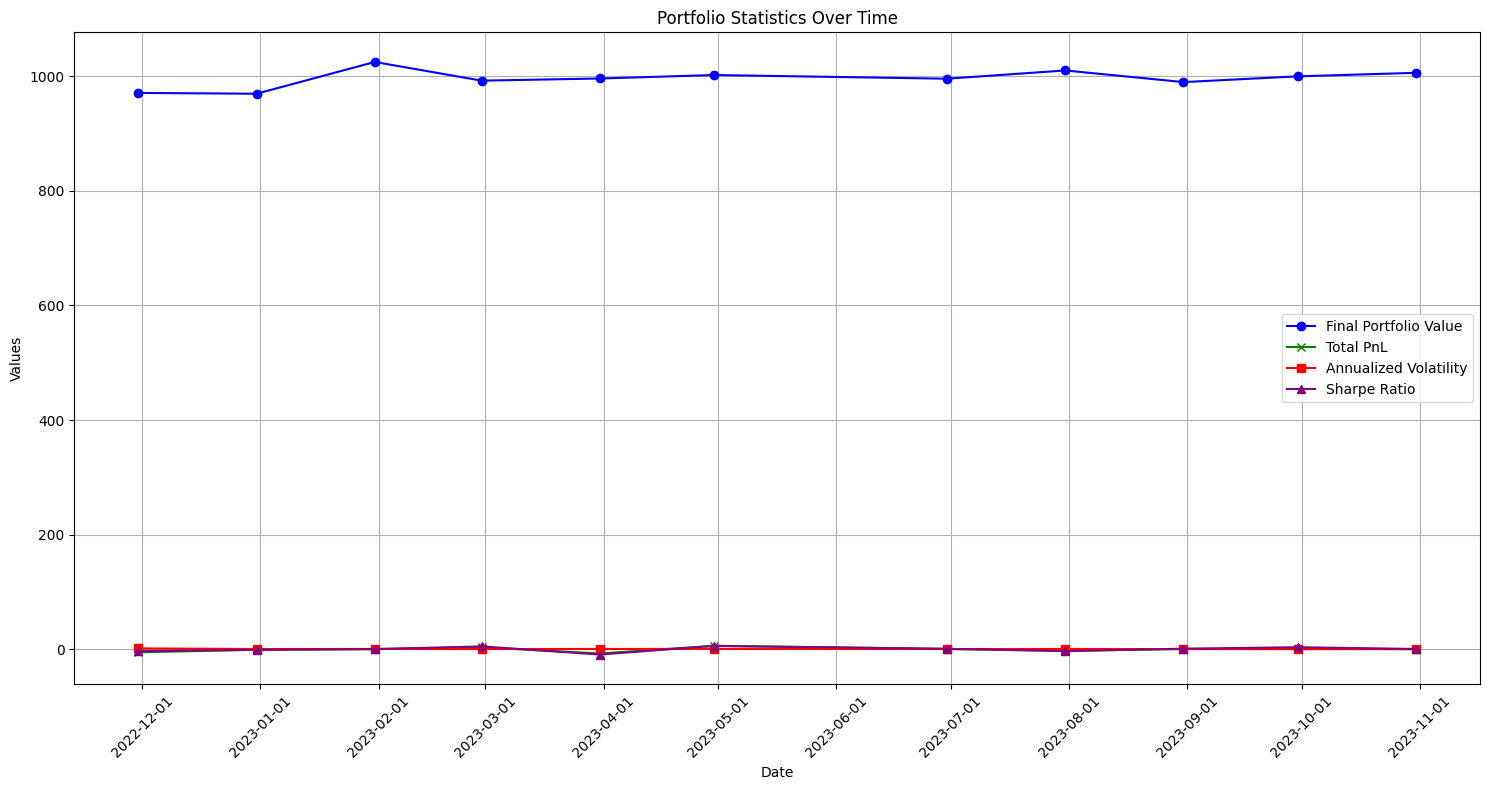

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Preparing data for plotting
dates = df['Date']
portfolio_values = df['Final Portfolio Value']
pnl = df['Total PnL']
volatility = df['Annualized Volatility']
sharpe_ratio = df['Sharpe Ratio']
trades = df['Total Trades']
turnover = df['Total Turnover']

# Creating the plot
plt.figure(figsize=(15, 8))

# Portfolio Value
plt.plot(dates, portfolio_values, label='Final Portfolio Value', color='blue', marker='o')

# Total PnL
plt.plot(dates, pnl, label='Total PnL', color='green', marker='x')

# Annualized Volatility
plt.plot(dates, volatility, label='Annualized Volatility', color='red', marker='s')

# Sharpe Ratio
plt.plot(dates, sharpe_ratio, label='Sharpe Ratio', color='purple', marker='^')

# Formatting and labels
plt.title('Portfolio Statistics Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
